

---



# 1. 주제 : 다음 분기에 어떤 게임을 설계해야 할까?
# 2. 필수 질문사항
* 지역에 따라서 선호하는 게임 장르가 다를까에 대한 대답
* 연도별 게임의 트렌드가 있을까 라는 질문에 대한 대답
* 출고량이 높은 게임에 대한 분석 및 시각화

# 3. Section내용
* Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

* Sprint 2 : Hypothesis Test, CI, Bayesian

* Sprint 3 : DR, PCA, Cluster

# 4. 칼럼내용

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.



---



# [목차]
# 1. [전처리]
## (1) 데이터확인, 결측치 확인, 데이터타입 확인
## (2) K,M 값 M값으로 통일
## (3) Total_Sales column추가


# 2. [데이터 분석 및 인사이트]
## (1) 지역과 장르
## (2) 연도와 장르
## (3) 플랫폼 분석
## (4) 게임별 분석
## (5) 결론



---



# [전처리]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/코드스테이츠/SPRINT1/week3/game_data.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

Mounted at /content/drive


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 1.전처리 과정
# 1-1. 데이터 확인
# 1-1-1. 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 1-1-2. 결측값은 전체행값이 거의17000인것에 비해 적은 양이므로 제거해준다
df = df.dropna(axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 1-1-3. 타입 확인
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

# 1-1-1. 전체 결측치 확인
- year, genre, publisher에 결측치 존재 확인

# 1-1-2. 타입 확인
- name, platform, genre는 당연히 object타입이지만,
sales가 float타입이 아니라서 이상치가 있을 것으로 판단된다


In [ ]:
# 1-2.Year의 결측치 정리
# 데이터를 살펴보면 20이상의 값이면 1900년도를 나타내고, 20이하의 값이면 2000년도를 나타낸다는 것을 알 수 있다.
# 함수를 사용하여 전부4자리 년도로 맞춰준다

def year(x):
    if x <= 20:
        x += 2000
        return x
    elif x >=20 and x <= 100:
        x += 1900
        return x
    else:
        return x

df['Year'] = df['Year'].apply(year)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 1-3. sales data
df.NA_Sales.value_counts()

0        4367
0.02      524
0.03      518
0.01      516
0.04      515
         ... 
3.05        1
5.89        1
1.23M       1
3.23        1
820K        1
Name: NA_Sales, Length: 489, dtype: int64

In [ ]:
# 1-3. K와 M값이 포함된 데이터처리
# 데이터를 보면 M과 K라는 문자열이 포함되어 있는 것을 알 수 있다.

# k포함 데이터
df[df.NA_Sales.str.contains('K')].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0


In [ ]:
# M포함 데이터
df[df.NA_Sales.str.contains('M')].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14


In [ ]:
# 1-3.
# Sales  
sales_col = df.columns[5:]

# K인 곳의 인덱스 저장
loc_k = df[df.NA_Sales.str.contains('K')].index

for col in sales_col:
    # K, M인 데이터 위치 가져오기
    sales_k = df.loc[df[col].str.contains('K'), col]
    sales_m = df.loc[df[col].str.contains('M'), col]

    # K를 M단위로 바꾸고 저장
    sales_k = sales_k.str.replace('K', '').astype(float) / 1000
    # M 빼고 저장
    sales_m = sales_m.str.replace('M', '').astype(float)
    
    # 기존 type이 string이기 때문에 변경해서 저장
    df.loc[df[col].str.contains('K'), col] = sales_k.astype(str)
    df.loc[df[col].str.contains('M'), col] = sales_m.astype(str)

# 변경되었는지 확인
df.loc[loc_k]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.0,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.0,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.0,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0.0,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.0,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


## 1-3. 정리 : K가 포함된 데이터는 정수이고, M이 포함된 데이터는 실수이므로 M을 기준으로 정리하였다.

In [ ]:
# 1.4 sales 데이터 실수형으로 변경

col = df.columns[-4:]
df[col] = df[col].astype(float)

df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# 2(1).
# 총 판매금액 컬럼 추가 하기
Total_sales = []
for i in df.index:
    t_sales = df.loc[i, 'NA_Sales' : 'Other_Sales'].sum()
    Total_sales.append(round(t_sales, 2))
df['Total_Sales'] = Total_sales
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08




---



#[데이터 분석 및 시각화] 
#: 주어진 데이터에는 문자형데이터 즉,범주형변수가 존재한다. 이러한 변수들간에 연관성이 있는지 chi-square test를 통해 파악해본다
#1. 지역과 장르
##1-1. 지역과 장르의 연관성 파악(chi-square test)
##1-2. 지역별 장르 선호도 시각화 및 분석

In [ ]:
# 1-1. 지역과 장르의 연관성 파악(chi-square test)
# 귀무가설 : 지역과 장르는 독립적이다.

from scipy.stats import chi2_contingency

# 장르별 지역 sales의 합을 위한 전처리
country_genre = df.groupby('Genre').sum().iloc[:-1,1:-1]
country_genre

# # chi-square test 실행
country_genre_chi2 = chi2_contingency(country_genre,correction=False)
print('country_genre chi-square test, pvalue:', country_genre_chi2[1])

country_genre chi-square test, pvalue: 5.732559952045929e-121


# 1-1. 정리
## p값(5.732559952045929e-121)은 0.05보다 작으므로 귀무가설을 기각한다.
= 연도와 장르는 독립적이지 않고 연관성이 있다.

In [ ]:
# 1-2. 지역별 장르 선호도
# 막대그래프 분석

temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# temp_genre.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
temp_grouped = temp_genre.groupby(['Genre']).sum()
temp_table = temp_grouped.reset_index()

temp_table.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
temp_table.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45


In [ ]:
# 판매량 합치기
temp_melted = pd.melt(temp_table, id_vars=['Genre'], value_vars=temp_table.columns[1:],
                      var_name='Sales Continent', value_name='Sales')
temp_melted.head()

,Genre,Sales Continent,Sales
0,Action,NA_Sales,858.75
1,Adventure,NA_Sales,101.79
2,Fighting,NA_Sales,220.35
3,Misc,NA_Sales,394.73
4,Platform,NA_Sales,445.38


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


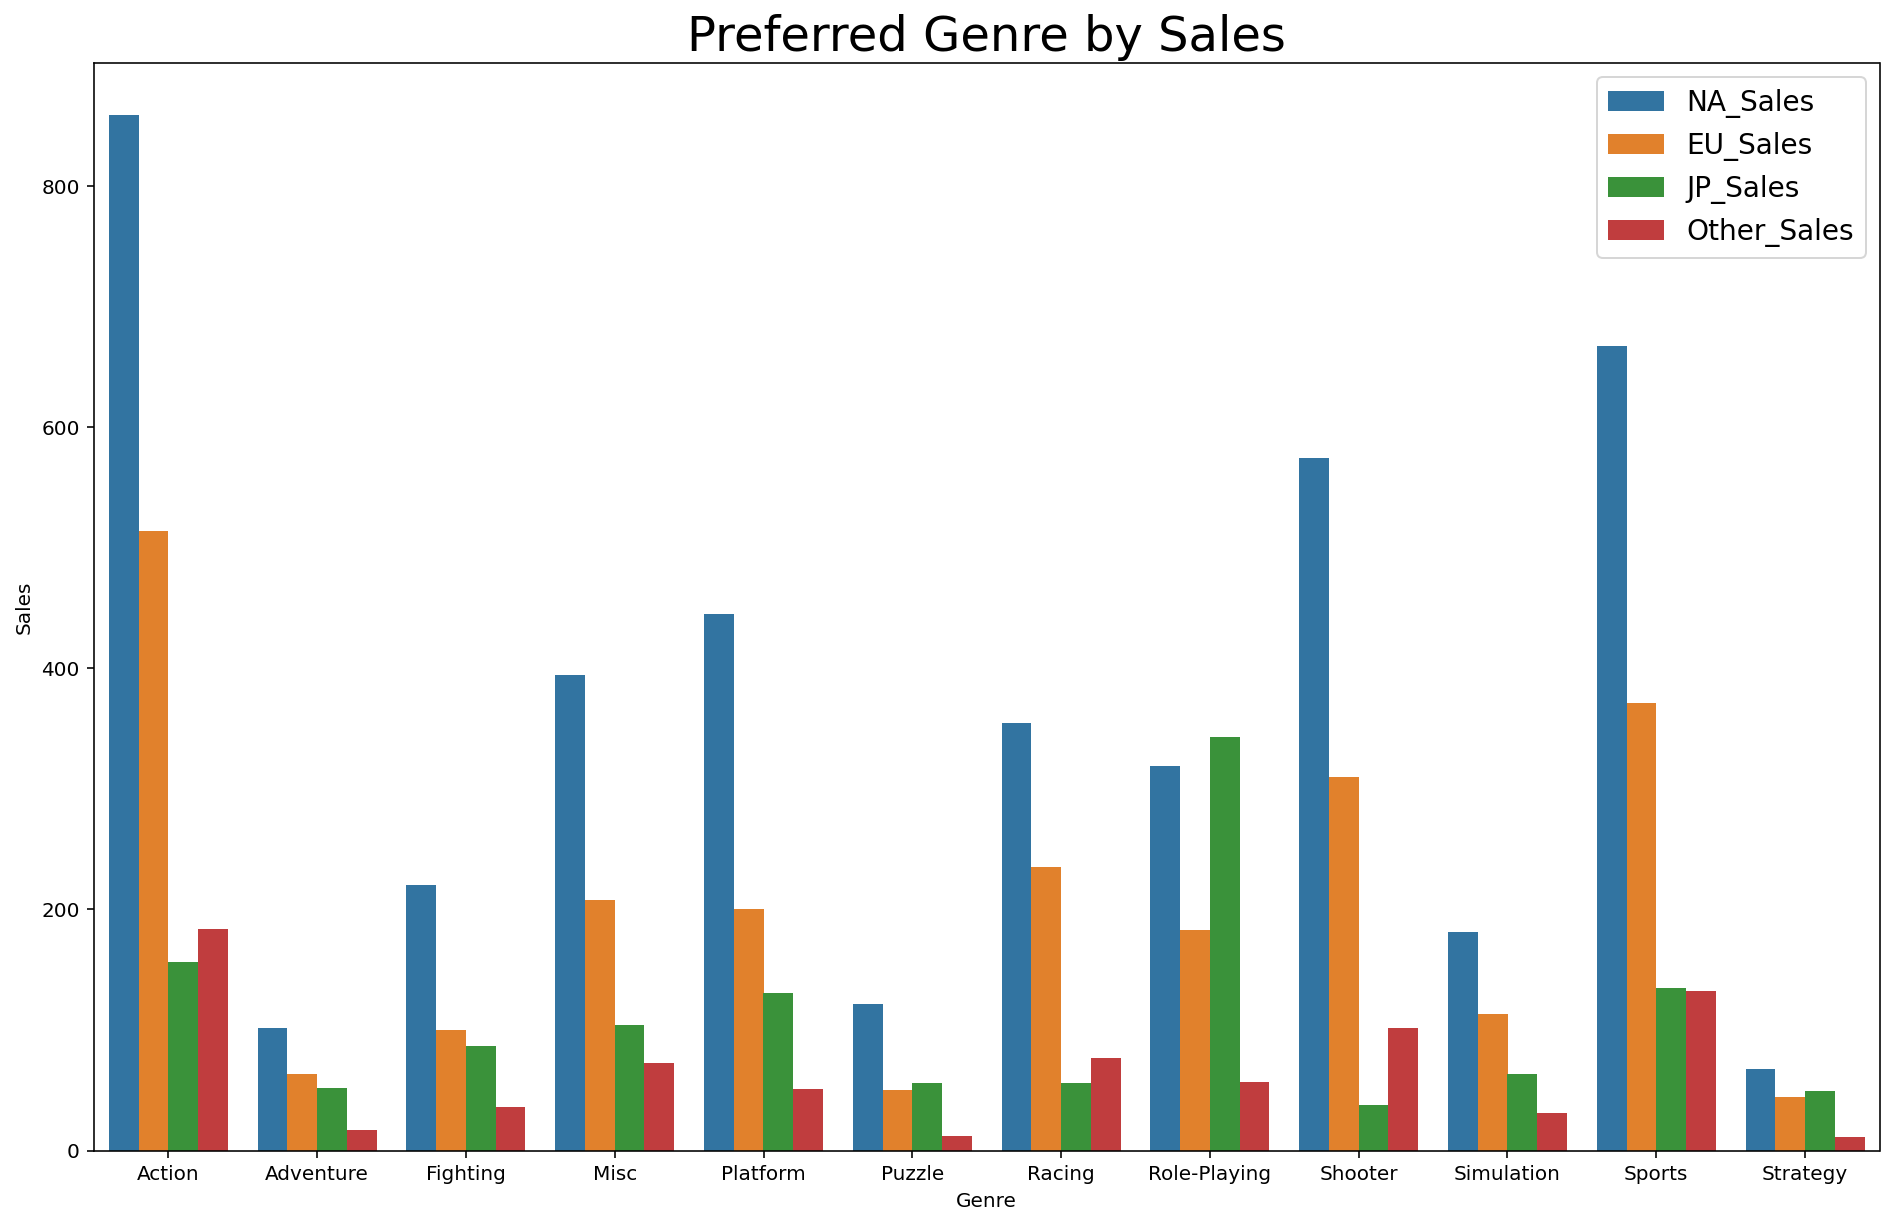

In [ ]:
# bar plot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
sns.barplot(data=temp_melted, x='Genre', y='Sales', hue='Sales Continent')
plt.title('Preferred Genre by Sales', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


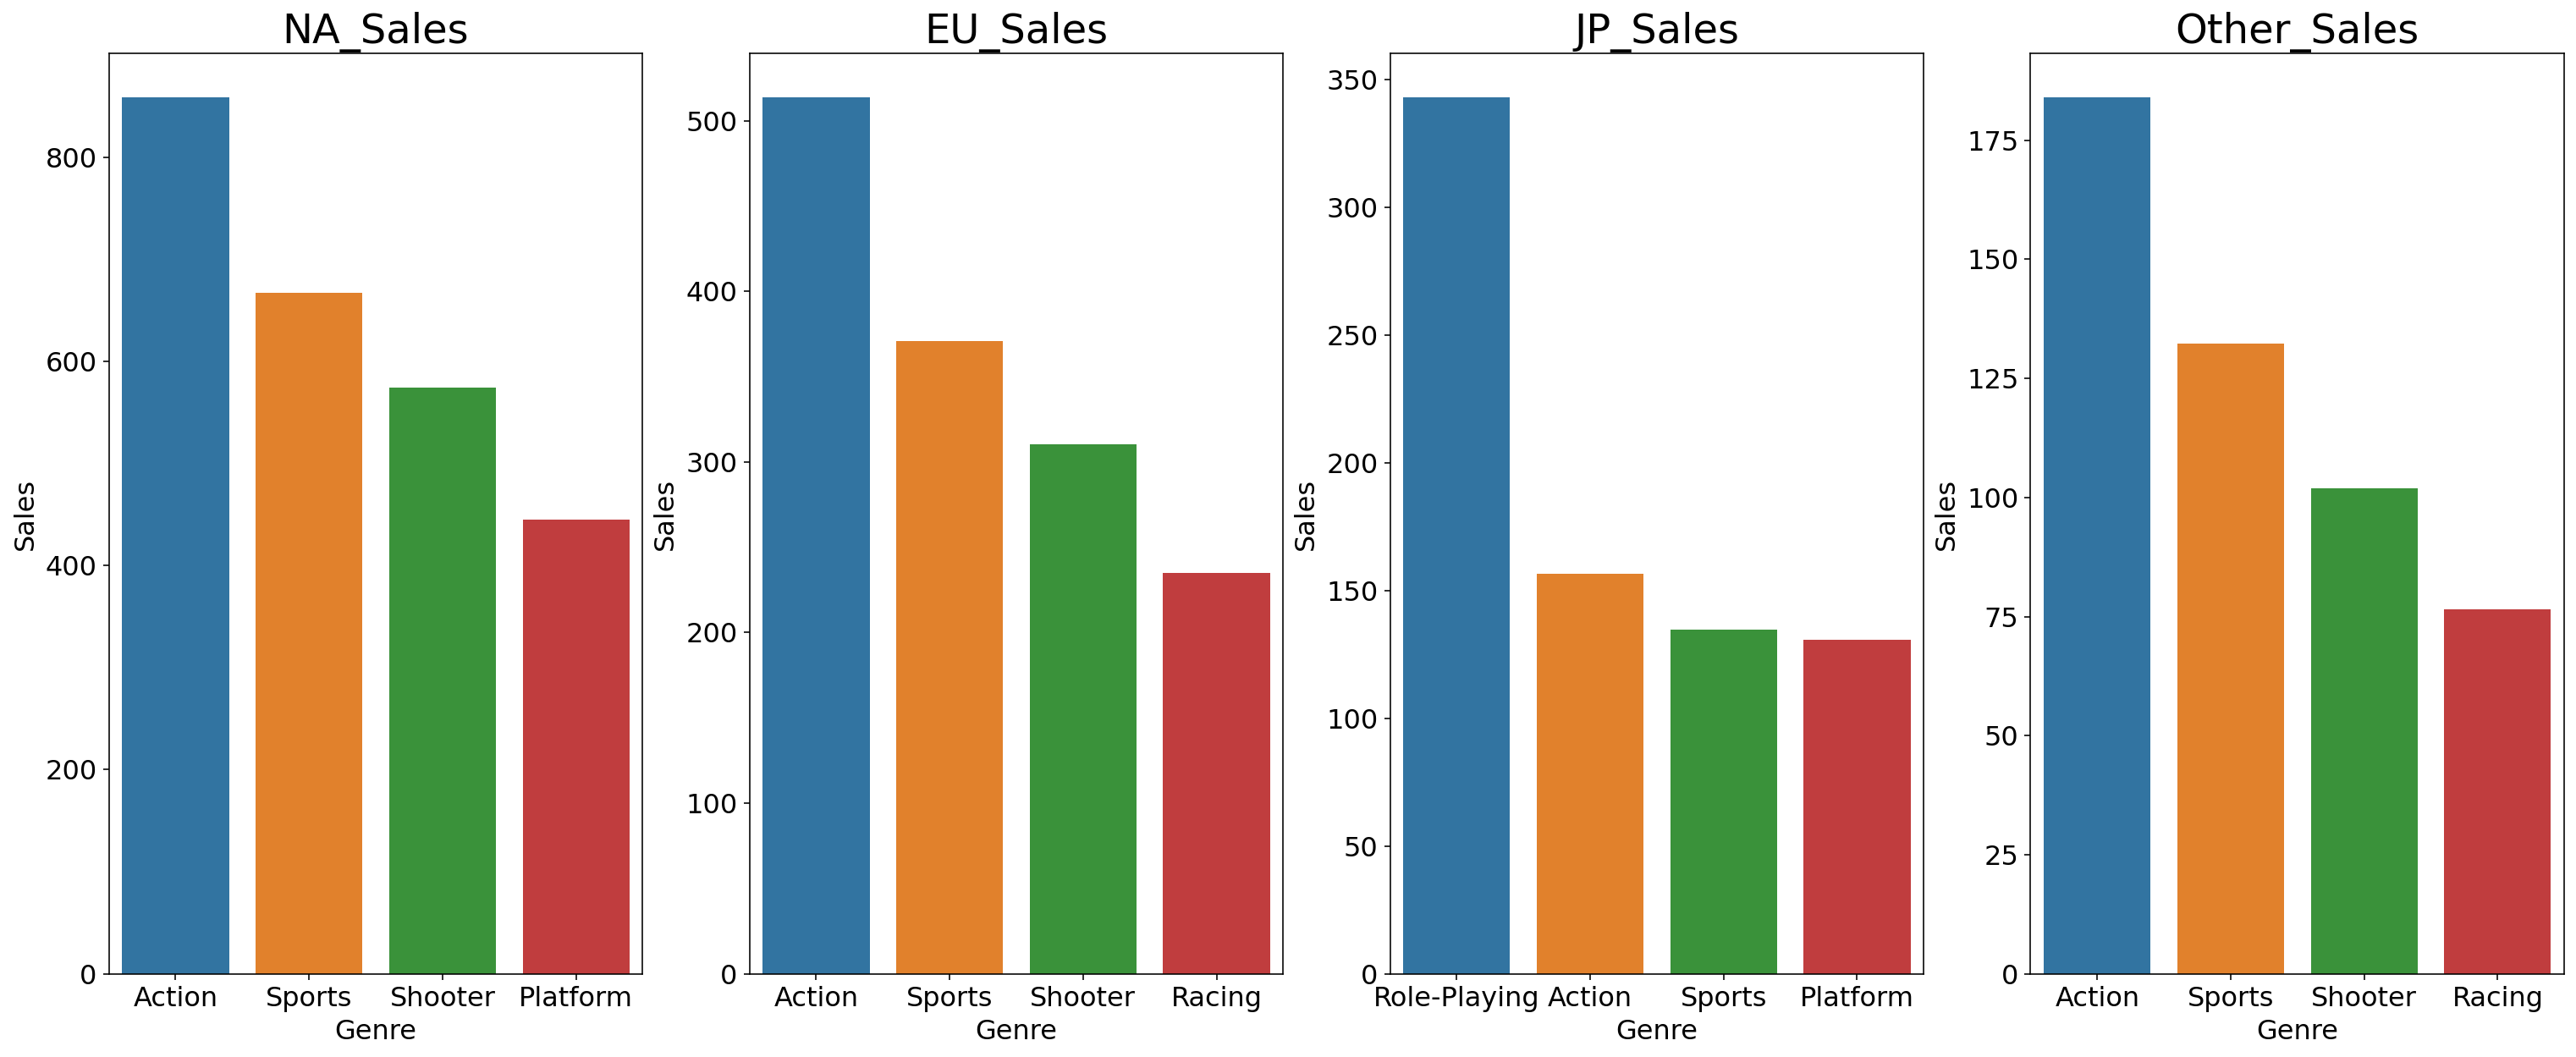

In [ ]:
# bar plot(국가별)

def genre_conti(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(4)
    new_df.columns = ['Genre', 'Sales']
    return new_df

# 데이터 저장
na_genre = genre_conti(temp_table, 'NA_Sales')
eu_genre = genre_conti(temp_table, 'EU_Sales')
jp_genre = genre_conti(temp_table, 'JP_Sales')
other_genre = genre_conti(temp_table, 'Other_Sales')

# 데이터 리스트에 담기
data_list = [na_genre, eu_genre, jp_genre, other_genre]
columns_list = temp_table.columns[1:]

# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col , fontsize=24)
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('Genre', fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
plt.show()

## 3개의 지역에서는 장르선호도는 1등은 액션,2등은 스포츠이지만, 일본에서는 특이하게 롤플레잉이 1등이다
# 그렇다면, heatmat을 통하여 상관관계(correation)가 있는지 살펴보자


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


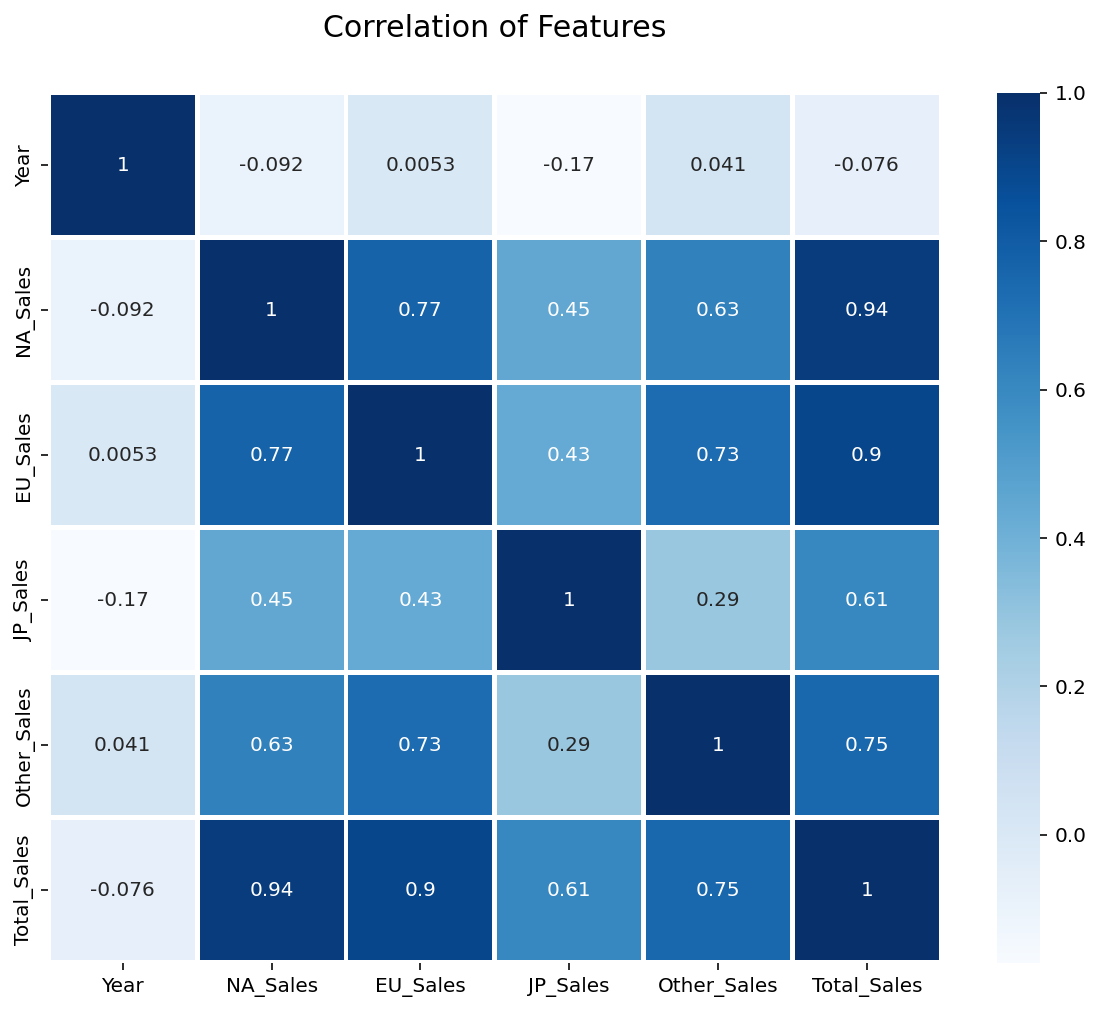

In [ ]:
# 1-3. 상관관계 분석
# 상관계수(corr함수)는 피어슨 상관계수를 사용하여, 숫자 데이터사이의 상관관계 파악가능
# 1에 가까울수록 관련성이 크다고 볼수 있다.
import copy

df1=copy.copy(df)

plt.figure(figsize=(10,8))
plt.title("Correlation of Features", y = 1.05, size = 15)

df1=df1.sort_values(by='Total_Sales',ascending=False)

sns.heatmap(df1.corr(), cmap = "Blues", annot=True, linewidth=2)  # red, yellow, blue색 사용가능

plt.show()

# 위 표를 통해서 변수들간의 상관관계를 알 수 있다
- NA_Sales와 Total_Sales 상관계수 (0.94)
- EU_Sales와 Total_Sales 상관계수 (0.90)
- Other_Sales와 Total_Sales 상관계수 (0.75)
- JP_Sales와 Total_Sales 상관계수 (0.61)
인 것을 알 수 있다.

위에서 보았듯이 전체 판매량이 NA와 EU의 판매량이 JP와의  상관관계보다 월등히 높기 때문에 지역별 장르선호도를 판단함에 있어서 JP만 롤플레잉 선호도가 높게 나왔다고 하여 전체를 판단하는데 있어서 큰 영향이 있지는 않을 것이다.

# 2. 연도와 장르
# 2-1. 연도와 장르의 연관성 파악(chi-square test)
# 2-2. 연도별 게임트렌드 파악

In [ ]:
# 2-1. 연도와 장르의 연관성 파악(chi-square test)
# 연도 x 장르 데이터 생성
year_genre = pd.DataFrame(df.pivot_table(index='Year',columns='Genre',values='Total_Sales',aggfunc=['sum'], fill_value=0))

# chi-square test 실행
year_genre_chi2 = chi2_contingency(year_genre,correction=False)
print('year_genre chi-square test, pvalue:', year_genre_chi2[1])

year_genre chi-square test, pvalue: 0.0


# 2-1. 정리
## p값은 0이므로 0.05보다 작으므로 귀무가설을 기각한다.
= 연도와 장르는 독립적이지 않고 연관성이 있다.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


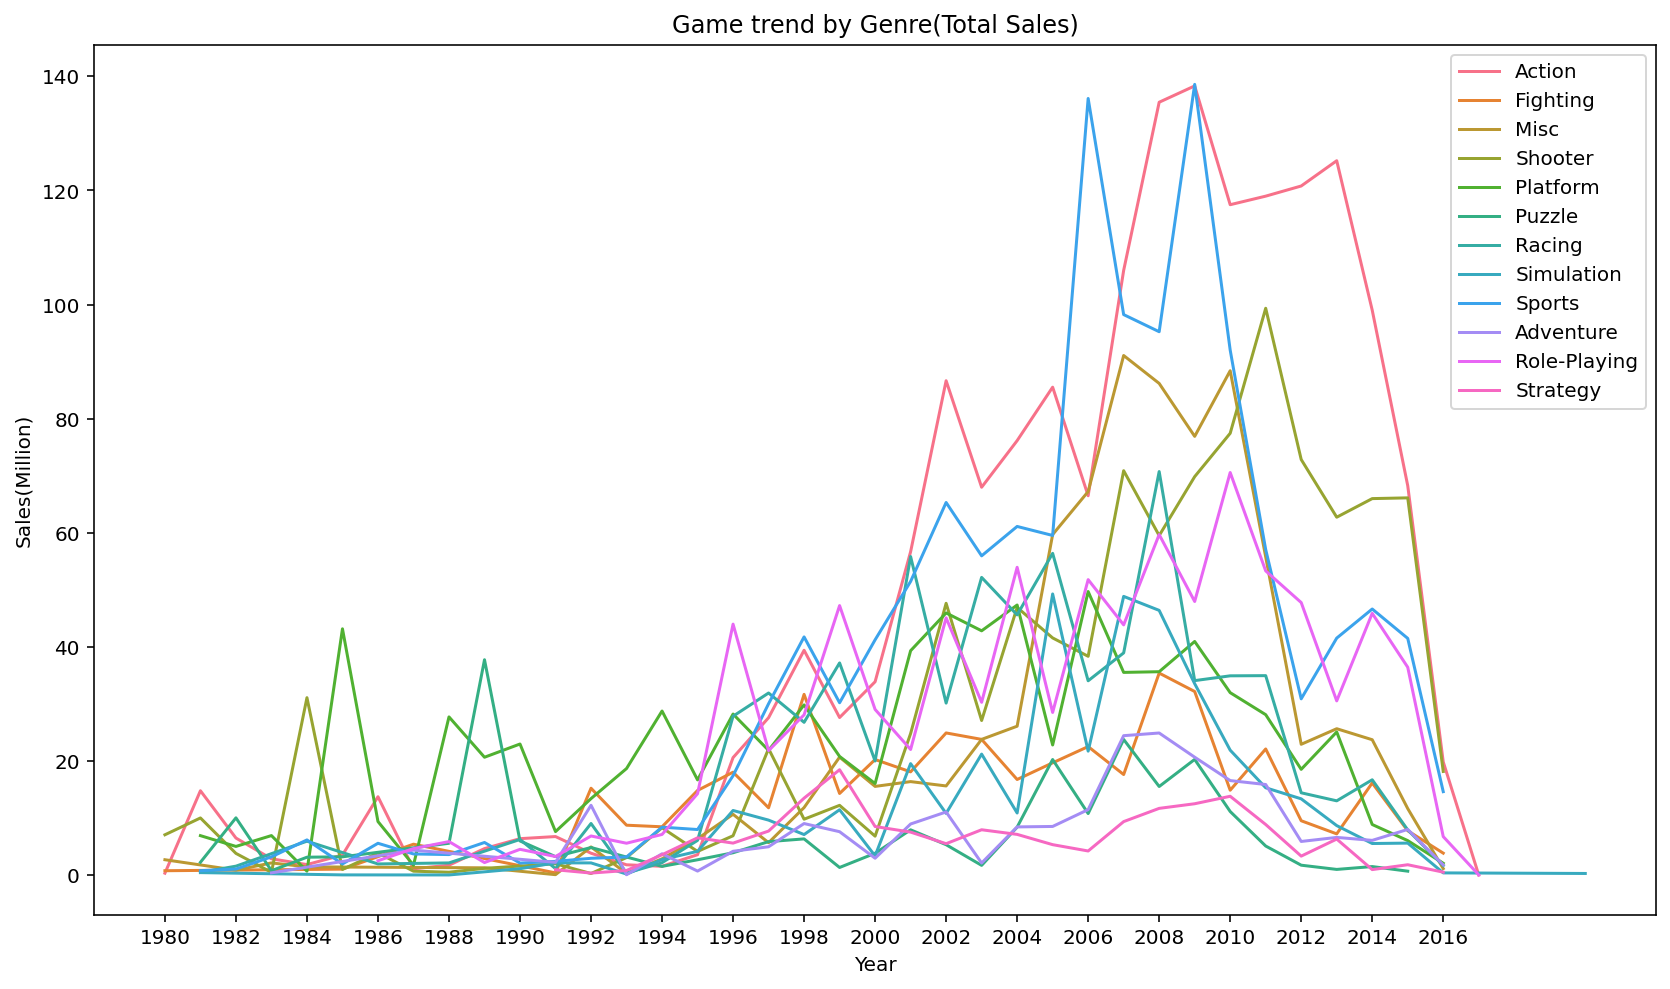

In [ ]:
# 2-2. 연도별 게임 트렌트 파악하기
# 2-2-1.Total Sales로 전체경향 파악하기(line plot)

TotalSales_Year_Genre = df.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()

plt.figure(figsize=(14,8))
plt.title('Game trend by Genre(Total Sales)')
sns.lineplot(x='Year',
             y='Total_Sales',
             hue='Genre',
             data=TotalSales_Year_Genre)
plt.xticks(range(1980,2018,2))
plt.xlabel('Year')
plt.ylabel('Sales(Million)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

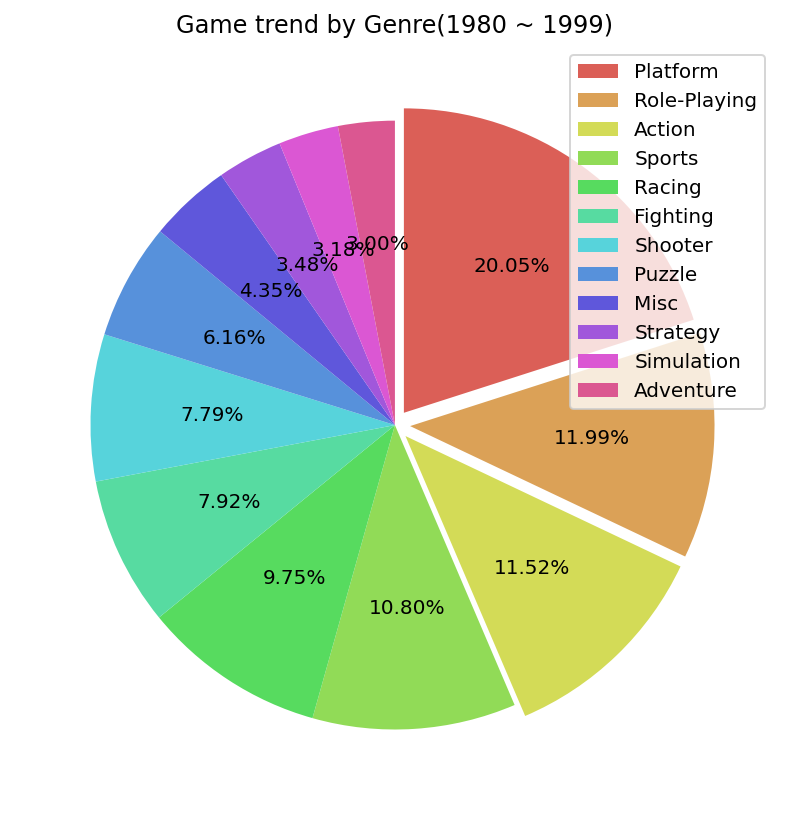

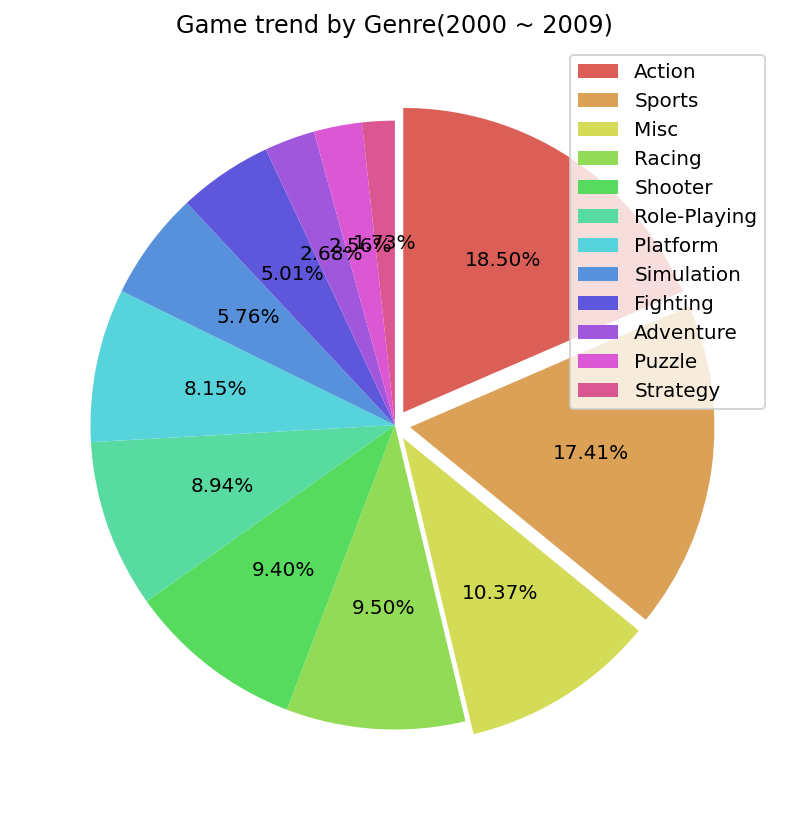

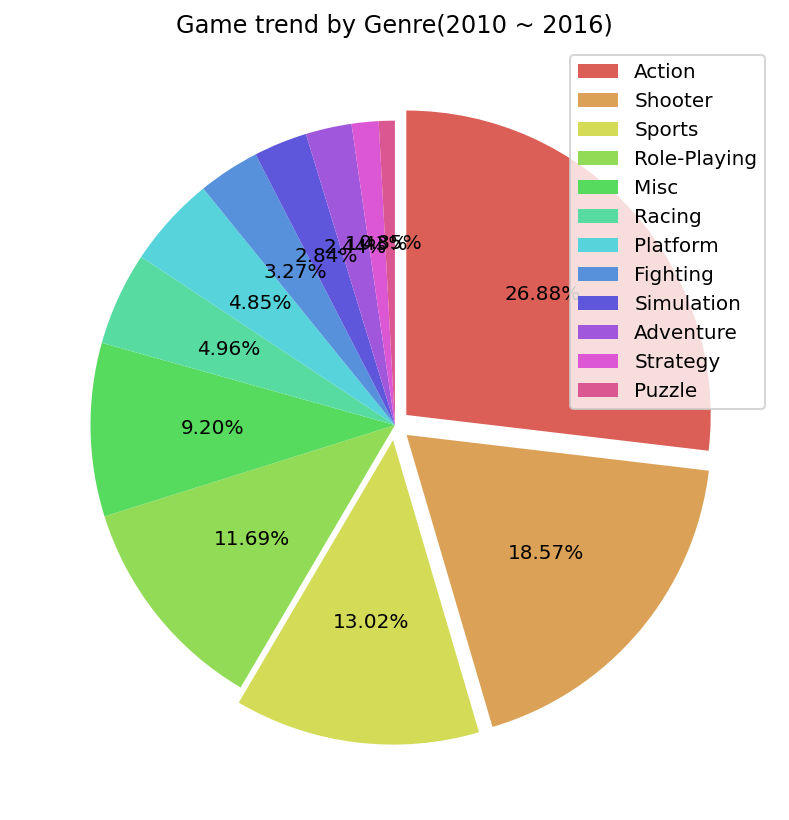

In [ ]:
# 2-2-2. 직관적인 시각화를 위해 pie그래프로 전환
grouped_genre_year = df.groupby(['Year','Genre'])
grouped_genre_year_count = grouped_genre_year.count()
grouped_genre_year_count.reset_index(inplace=True)
grouped_genre_year_count = grouped_genre_year_count.iloc[:,:3]
grouped_genre_year_count.columns = ['Year','Genre','Count']
grouped_gy_total = grouped_genre_year_count.groupby('Year')
grouped_gy_total_sum = grouped_gy_total.sum()
grouped_gy_total_sum.reset_index(inplace=True)
grouped_gy_total_sum.columns = ['Year','Years_total']
merged_g_y = pd.merge(grouped_genre_year_count,grouped_gy_total_sum,how = 'inner')
merged_g_y['Rate'] = (merged_g_y.Count/merged_g_y.Years_total*100)
merged_g_y = merged_g_y[['Year','Genre','Rate']]
merged_g_y

grouped_genre_year_sum = grouped_genre_year.sum()
grouped_genre_year_sum.reset_index(inplace=True)
grouped_genre_year_sum

#시대별 장르 출고량의 비율
def year_cut(df,a,b) :
  df_cut = df.loc[(df.Year>=a)&(df.Year<=b)][['Genre','Total_Sales']]
  df_cut_grouped = df_cut.groupby('Genre')
  df_cut_grouped_sum = df_cut_grouped.sum()
  df_cut_grouped_sum.reset_index(inplace=True)
  df_cut_grouped_sum['Total_Sales'] = df_cut_grouped_sum['Total_Sales']/df_cut_grouped_sum['Total_Sales'].sum()*100
  df_cut_grouped_sum.sort_values(by=['Total_Sales'],axis=0,inplace=True,ascending=False)
  return df_cut_grouped_sum

#연도별로 cut
y_80 = year_cut(grouped_genre_year_sum,1980,1999)
y_00 = year_cut(grouped_genre_year_sum,2000,2009)
y_10 = year_cut(grouped_genre_year_sum,2010,2019)

labels = y_80['Genre'] ## 라벨
frequency = y_80['Total_Sales'] ## 빈도
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
fig = plt.figure(figsize=(7,7)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성 
explode = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # 튀어나오는 모양
pie = ax.pie(frequency,explode = explode
             ,startangle=90,counterclock=False, autopct=lambda p : '{:.2f}%'.format(p), colors = colors) 
plt.legend(pie[0],labels) ## 범례 표시
plt.title('Game trend by Genre(1980 ~ 1999)')
plt.show()

labels = y_00['Genre'] ## 라벨
frequency = y_00['Total_Sales'] ## 빈도
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
fig = plt.figure(figsize=(7,7)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성 
explode = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # 튀어나오는 모양
pie = ax.pie(frequency, explode = explode, 
             startangle=90, counterclock=False, autopct=lambda p : '{:.2f}%'.format(p), colors = colors) 
plt.legend(pie[0],labels) ## 범례 표시
plt.title('Game trend by Genre(2000 ~ 2009)')
plt.show()

labels = y_10['Genre'] ## 라벨
frequency = y_10['Total_Sales'] ## 빈도
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
fig = plt.figure(figsize=(7,7)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성 
explode = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # 튀어나오는 모양
pie = ax.pie(frequency, explode = explode,
             startangle=90, counterclock=False, autopct=lambda p : '{:.2f}%'.format(p), colors = colors) 
plt.legend(pie[0],labels) ## 범례 표시
plt.title('Game trend by Genre(2010 ~ 2016)')
plt.show()

# 2-2.정리
* 1980 ~ 1999 : platform, role-playing, action
* 2000 ~ 2009 : action, sports, misc
* 2010 ~ 2016 : action, shooter, sports 
순으로 점유율이 나왔다.

* 2000년 중반까지는 대체적으로 매년 다양하게 수요가 있었다.
* 게임 수요가 급증하는 2000년 초반부터 액션게임의 수요가 압도적이었다.
* 눈여겨 볼 점은 수요가 폭발적이었던 2006년과 2009년에는 스포츠장르의 수요가 액션 장르를 이겼다.
* 최근 10년간 장르 순위: Action - Sports - Shooter -Misc - Role-Playing

* 최근 10년 중 판매량 1위인 Action 장르는 2012~2013년 가장 인기가 많았고, 매년 인기 장르 1위를 기록하였다.

* 판매량 2위의 Shooter 장르는 2016년이 2007년 대비 2배 이상의 인기를 보였고, 매년 증가하는 추세이다.

* 판매량 4위의 Misc 장르는 2010년을 제외하고 매년 판매량이 감소하였으며, 2016년에는 1.6%를 기록했다.

## - 최근 판매량으로 봤을 때 action과 sports 장르가 가장 많다
##- 다음분기에는 action이나, shooter게임 출시하는게 좋을것으로 보인다.

# 3. 연도와 플랫폼
## - 플랫폼은 기계장치이다보니 기술이 발전될수록 새로운 기기들이 생기고 이전의 기기들은 도태되다보니 최근의 플랫폼데이터들이 중요하다.


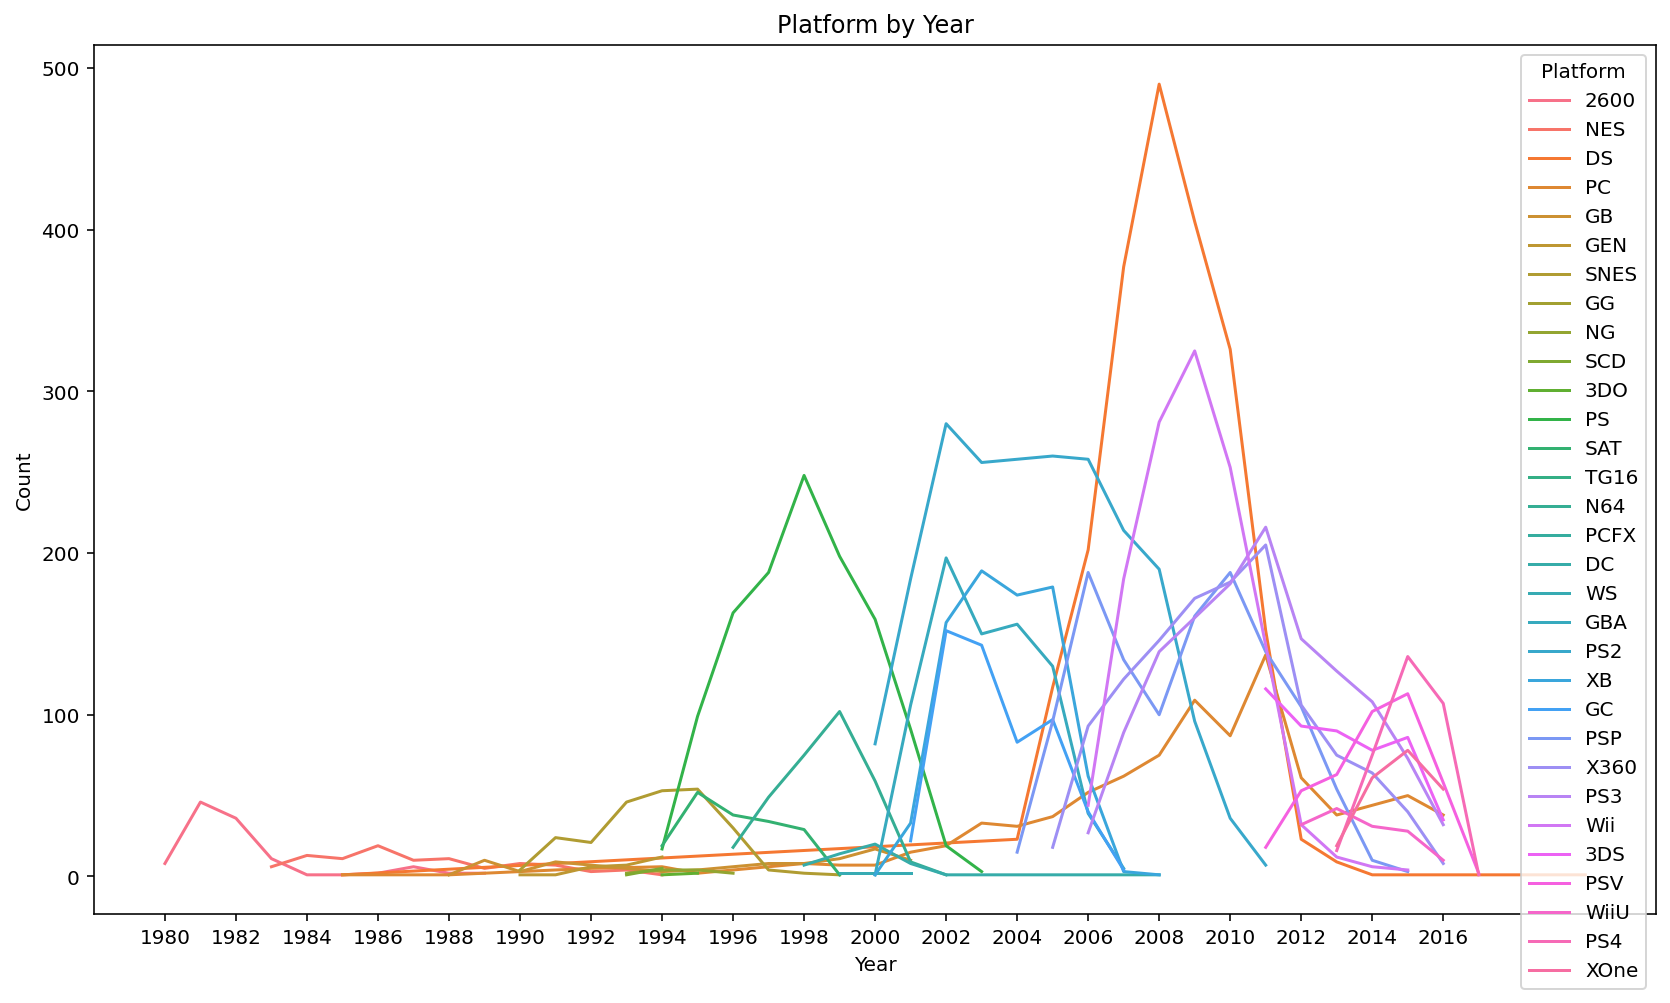

In [ ]:
# 3. 연도에 따른 플랫폼 변화

year_platform = df.groupby(['Year','Platform'])
year_platform_count = year_platform.count()
year_platform_count.reset_index(inplace=True)

df_platform_count=year_platform_count[['Year','Platform','Name']]
df_platform_count.columns = ['Year','Platform','Count']

plt.figure(figsize=(14,8))
plt.title('Platform by Year')
sns.lineplot(data=df_platform_count,x='Year',y='Count', hue='Platform')
plt.xticks(range(1980,2018,2))
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


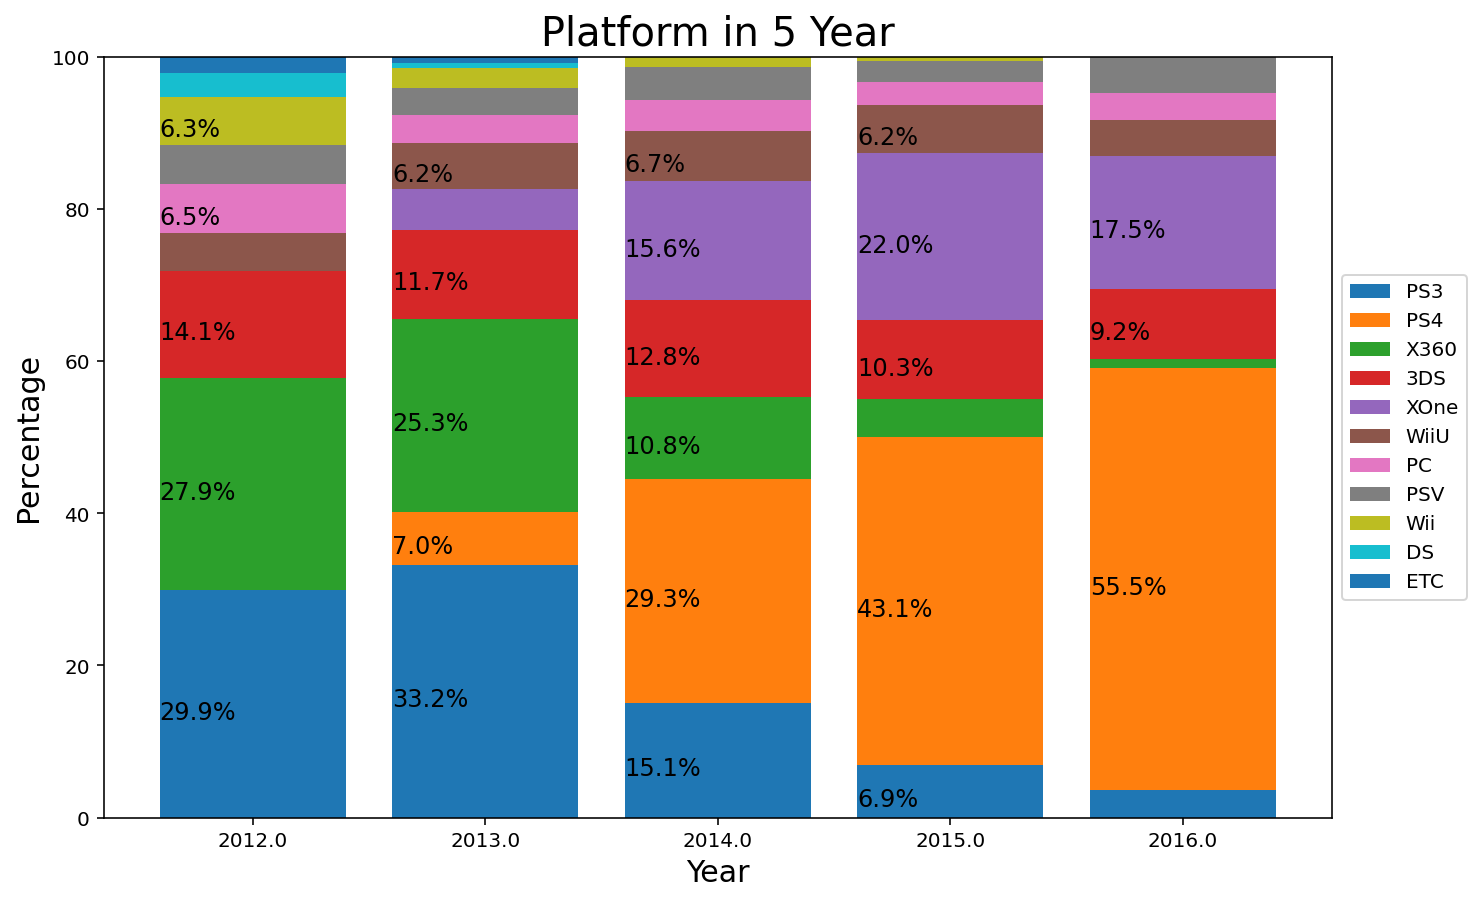

In [ ]:
# 3. 직관적인 시각화를 위해서 stack을 이용한 barplot사용
# 연도 x 플랫폼 데이터 생성

df_5 = df[(df.Year>2011) & (df.Year<2017)]

year_platform1= pd.DataFrame(df_5.pivot_table(index='Year',columns='Platform',values='Total_Sales',aggfunc=['sum'], fill_value=0))

yp = year_platform1.copy()
yp_head = []
for i in range(len(yp.columns)):
  yp_head.append(yp.columns[i][1])
yp.columns = yp_head

# 10년동안 가장 많은 platform별 sales를 기준으로 정렬 및 top10 선출
yp.loc['All'] = yp.sum()
yp.sort_values(by='All',axis=1,ascending=False, inplace=True)
yp_graph = yp.iloc[:-1,:10]
yp_graph['ETC'] = yp.iloc[:-1,10:].sum(axis=1)

# 퍼센트로 시각화
yp_ind = yp_graph.index
yp_col = yp_graph.columns

yp_graph_100 = pd.DataFrame(index = yp_ind, columns=yp_col)
yp_graph_100
for i in range(len(yp_ind)):
  yp_graph_100.iloc[i] = yp_graph.iloc[i]/yp_graph.iloc[i].sum()


topics = yp_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(11,7))
for i in range(len(yp_col)):
  plt.bar(x,yp_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yp_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Platform in 5 Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yp_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yp_ind)):
  sum = 0
  value = 0
  for j in range(len(yp_col)):
    sum += yp_graph_100.iloc[i,j]*100
    value =round(yp_graph_100.iloc[i,j]*100,2)
    if value > 6:
      plt.text(x[i]-0.4,sum - (yp_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

# 3. 정리
* 닌텐도 DS는 2007년부터 2010년까지 바짝 전성기였었다.
* PS시리즈는 새로운 시리즈가 나오면 항상 인기가 있었다.
* 최근 4년동안 트렌드를 보면 PS4의 인기가 가장 많기도 하였으므로 최우선적으로는 PS플랫폼으로 출시하여야 할 것이다.**굵은 텍스트**

# 4. 출고량이 높은 게임 분석
## 4-1. 전체기간 판매량 순위
## 4-2. 최근 10년간 판매량 순위


In [ ]:
# 4-1. 전체기간 판매량 순위
game_sale_rank = df.sort_values(by=['Total_Sales'], ascending=False)
game_sale_rank = game_sale_rank[['Name', 'Year', 'Platform','Genre', 'Total_Sales']]
game_sale_rank = game_sale_rank.reset_index(drop=True)
game_sale_rank.head(10)

,Name,Year,Platform,Genre,Total_Sales
0,Wii Sports,2006.0,Wii,Sports,82.74
1,Super Mario Bros.,1985.0,NES,Platform,40.24
2,Mario Kart Wii,2008.0,Wii,Racing,35.83
3,Wii Sports Resort,2009.0,Wii,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,GB,Role-Playing,31.38
5,Tetris,1989.0,GB,Puzzle,30.26
6,New Super Mario Bros.,2006.0,DS,Platform,30.01
7,Wii Play,2006.0,Wii,Misc,29.01
8,New Super Mario Bros. Wii,2009.0,Wii,Platform,28.61
9,Duck Hunt,1984.0,NES,Shooter,28.31


In [ ]:
# 4-2. 최근 5년간 판매량 순위
game_sale_rank5 = df[df.Year >= 2012].sort_values(by=['Total_Sales'], ascending=False)
game_sale_rank5 = game_sale_rank5[['Name', 'Year', 'Platform','Genre', 'Total_Sales']]
game_sale_rank5 = game_sale_rank5.reset_index(drop=True)
game_sale_rank5.head(10)


,Name,Year,Platform,Genre,Total_Sales
0,Grand Theft Auto V,2013.0,PS3,Action,21.39
1,Grand Theft Auto V,2013.0,X360,Action,16.38
2,Call of Duty: Black Ops 3,2015.0,PS4,Shooter,14.24
3,Call of Duty: Black Ops II,2012.0,PS3,Shooter,14.04
4,Call of Duty: Black Ops II,2012.0,X360,Shooter,13.74
5,Grand Theft Auto V,2014.0,PS4,Action,11.99
6,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014.0,3DS,Role-Playing,11.33
7,Call of Duty: Ghosts,2013.0,X360,Shooter,10.21
8,New Super Mario Bros. 2,2012.0,3DS,Platform,9.83
9,Halo 4,2012.0,X360,Shooter,9.76


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


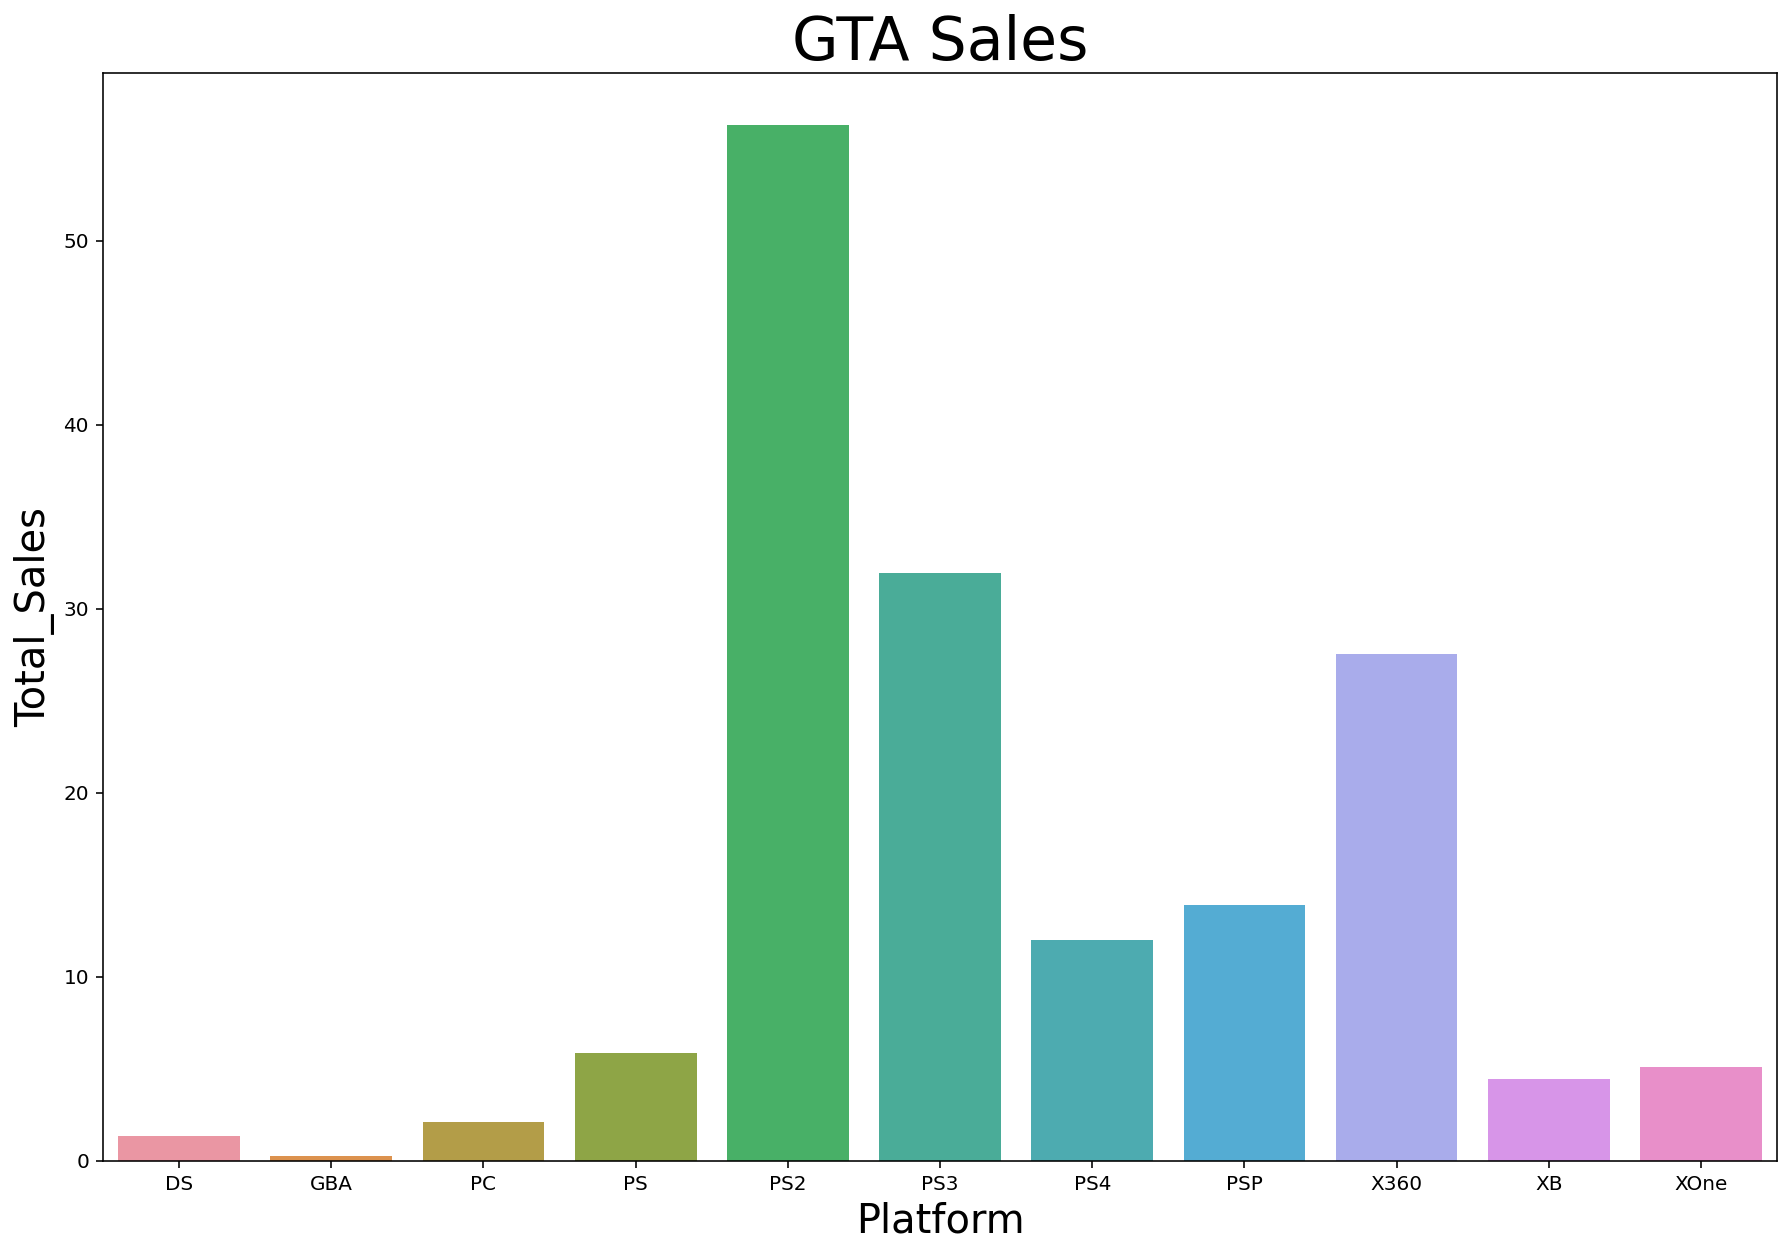

In [ ]:
# 4-3-1. GTA분석
df_gta = df[df['Name'].str.contains('Grand Theft Auto')]

gta_platform = df_gta.groupby('Platform').sum()
gta_platform = gta_platform[['Total_Sales']]
gta_platform = gta_platform.reset_index()
gta_platform

plt.figure(figsize=(15, 10))
plt.title("GTA Sales", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.barplot(x='Platform', y='Total_Sales', data=gta_platform);

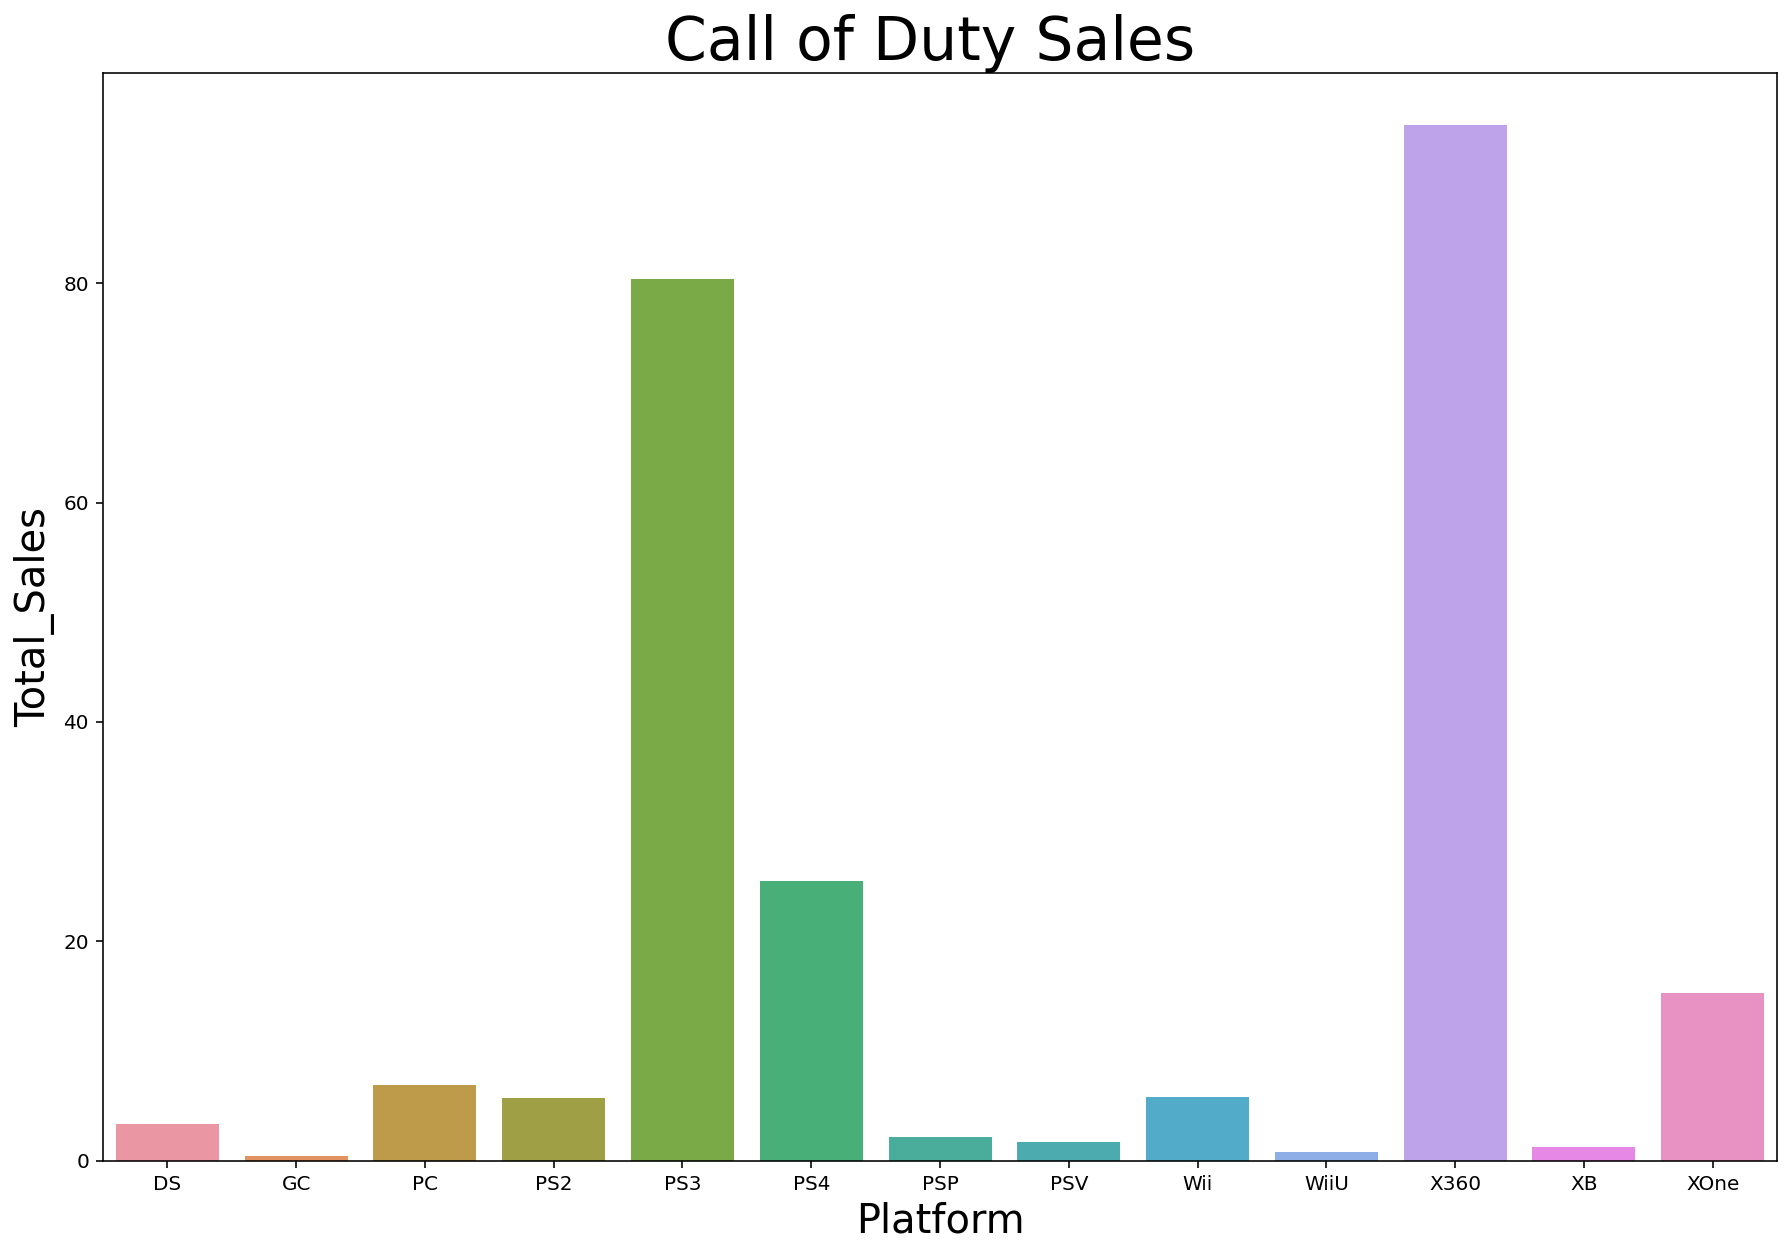

In [ ]:
# 4-3-2. Call of duty분석
df_cod = df[df['Name'].str.contains('Call of Duty')]

cod_platform = df_cod.groupby('Platform').sum()
cod_platform = cod_platform[['Total_Sales']]
cod_platform = cod_platform.reset_index()
cod_platform

plt.figure(figsize=(15, 10))
plt.title("Call of Duty Sales ", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.barplot(x='Platform', y='Total_Sales', data=cod_platform);

# 4-1.정리
* #3의 그래프에서 보다시피 2006~-2008년 사이에 Will와 DS(닌텐도)의 판매량이 급등한것을 볼수 있고, 그 결과 전체기간 판매량에 있어서도 wii플랫폼의 게임인 wii sport, mario cart등의 게임이 상위권에 속해있음을 알 수 있다.

# 4-2.정리
* 최근 5년의 게임별 판매량 순위를 살펴보면, #3에서 보았듯이 PS플랫폼에서 출시한 게임들의 판매량이 높았다.
* 특이한 점으로는 GTA와 Call of duty의 시리즈 게임들이 강세를 보임을 알 수 있다.

# 4-3.정리
* GTA는 Action장르 게임으로서 PS플랫폼에서 많은 매출을 보여주었다
* Call of Duty는 Shooter장르 게임으로서 XBOX플랫폼에서 PS플랫폼보다 근소하게 많은 매출을 보여주었다.

# 결론
# - 플랫폼 : 1순위 = PS4, 2순위 = XBOX
# - 장르 : 1순위 = Action, 2순위 = Shooter
# - 지역 : 1순위 = NA , 2순위 = EU

#[추가로 고민해볼 문제]
* pca를 적용해볼 사항 고민해보기
